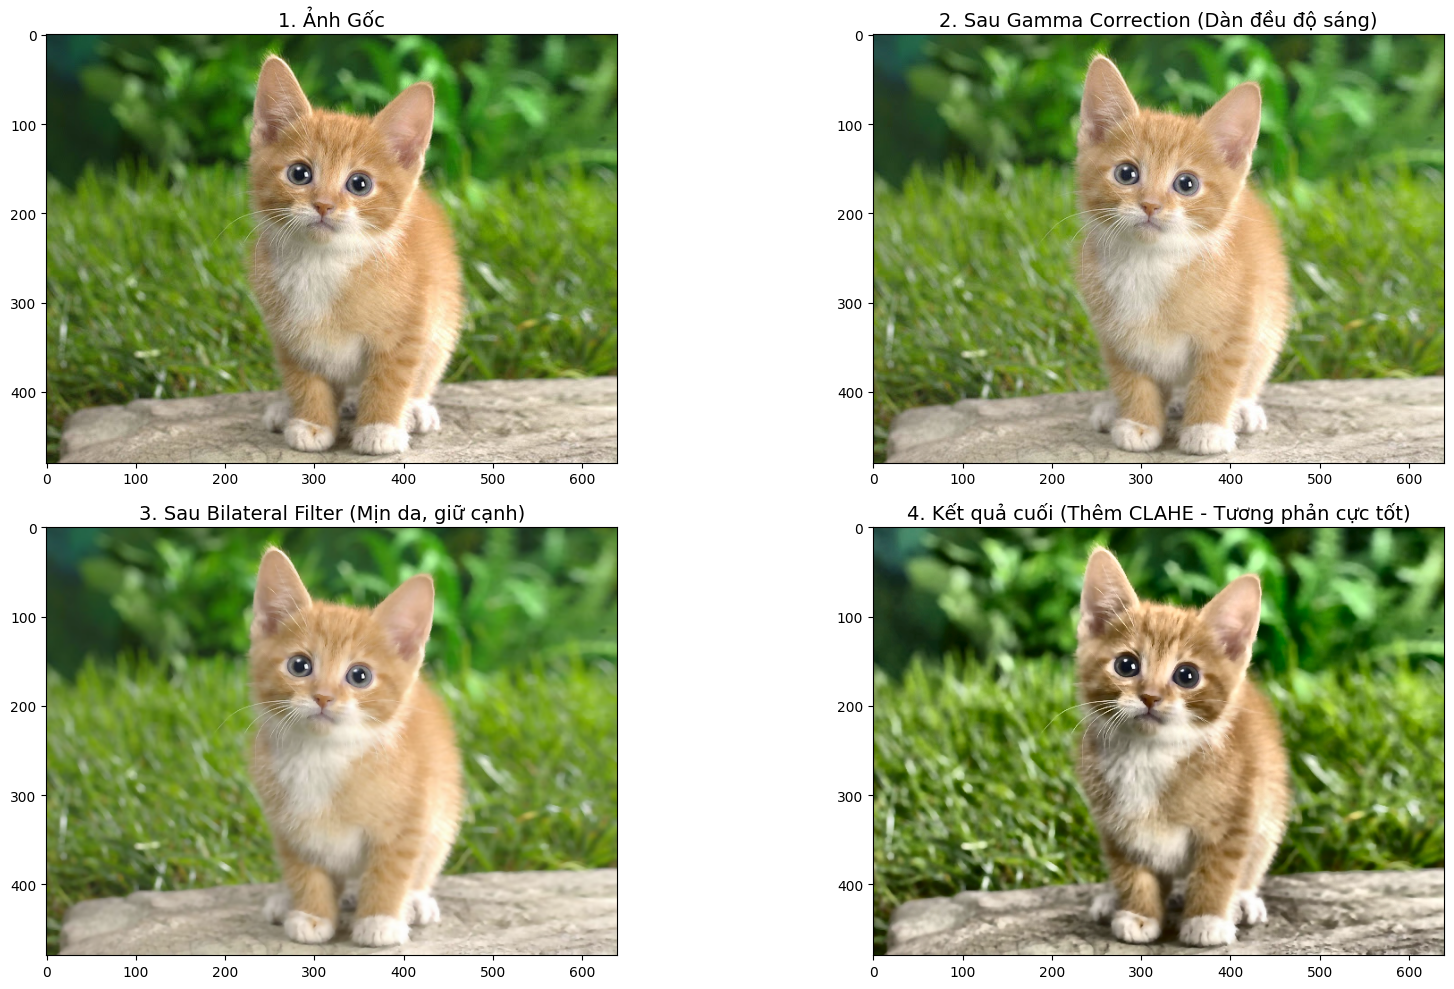

Quy trình xử lý: Gốc -> Gamma(1.2) -> Bilateral(5,50,50) -> CLAHE(2.0, 8x8)


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

def apply_gamma(image, gamma=1.2):
    inv_gamma = 1.0 / gamma
    lut = np.array([((i / 255.0) ** inv_gamma) * 255 for i in range(256)]).astype("uint8")
    return cv.LUT(image, lut)

def apply_clahe(image, clip_limit=2.0, tile_size=(8, 8)):
    lab = cv.cvtColor(image, cv.COLOR_BGR2LAB)
    l, a, b = cv.split(lab)
    clahe = cv.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)
    l = clahe.apply(l)
    lab = cv.merge((l, a, b))
    return cv.cvtColor(lab, cv.COLOR_LAB2BGR)

# 1. Tải ảnh từ URL
url = "https://1.bp.blogspot.com/-lpEszu0VfWs/WDr_CuxZc_I/AAAAAAAAAOQ/C85FAmuFwTYgXFkK0q0OYWuOd5WEjzzAgCLcB/s640/Cat.jpg"
response = requests.get(url)
img = np.array(Image.open(BytesIO(response.content)))
img_bgr = cv.cvtColor(img, cv.COLOR_RGB2BGR)

# 2. Thực hiện các bước tiền xử lý (Sử dụng thông số thực tế từ dự án)

# Bước 1: Gamma Correction (gamma=1.2)
gamma_img = apply_gamma(img_bgr, gamma=1.2)

# Bước 2: Bilateral Filter (d=5, sigmaColor=50, sigmaSpace=50)
bilateral_img = cv.bilateralFilter(gamma_img, d=5, sigmaColor=50, sigmaSpace=50)

# Bước 3: CLAHE (clipLimit=2.0, tileGridSize=(8,8))
final_img = apply_clahe(bilateral_img, clip_limit=2.0, tile_size=(8, 8))

# 3. Hiển thị kết quả so sánh
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
plt.title("1. Ảnh Gốc", fontsize=14)
plt.imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(2, 2, 2)
plt.title("2. Sau Gamma Correction (Dàn đều độ sáng)", fontsize=14)
plt.imshow(cv.cvtColor(gamma_img, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(2, 2, 3)
plt.title("3. Sau Bilateral Filter (Mịn da, giữ cạnh)", fontsize=14)
plt.imshow(cv.cvtColor(bilateral_img, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(2, 2, 4)
plt.title("4. Kết quả cuối (Thêm CLAHE - Tương phản cực tốt)", fontsize=14)
plt.imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.tight_layout()
plt.show()

print("Quy trình xử lý: Gốc -> Gamma(1.2) -> Bilateral(5,50,50) -> CLAHE(2.0, 8x8)")